In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import numpy as np
from altair import *
import collections
import re
from wordcloud import WordCloud
import string

In [4]:
tweets = pd.read_csv('Tweets.csv')

In [5]:
tweets.head(30)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0   570306133677760513           neutral                        1.0000   
1   570301130888122368          positive                        0.3486   
2   570301083672813571           neutral                        0.6837   
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
6   570300616901320704          positive                        0.6745   
7   570300248553349120           neutral                        0.6340   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
10  570294189143031808           neutral                        0.6769   
11  570289724453216256          positive                        1.0000   
12  570289584061480960          positive                        1.0000   
13  570287408438120448          positive                        0.6451   
14  570285904809598977          positive                        1.0000   
15  570282469121007616          negative                        0.6842   
16  570277724385734656          positive                        1.0000   
17  570276917301137409          negative                        1.0000   
18  570270684619923457          positive                        1.0000   
19  570267956648792064          positive                        1.0000   
20  570265883513384960          negative                        0.6705   
21  570264145116819457          positive                        1.0000   
22  570259420287868928          positive                        1.0000   
23  570258822297579520           neutral                        1.0000   
24  570256553502068736          negative                        1.0000   
25  570249102404923392          negative                        1.0000   
26  570239632807370753          negative                        1.0000   
27  570217831557677057           neutral                        0.6854   
28  570207886493782019          negative                        1.0000   
29  570124596180955136           neutral                        0.6150   

            negativereason  negativereason_confidence         airline  \
0                      NaN                        NaN  Virgin America   
1                      NaN                     0.0000  Virgin America   
2                      NaN                        NaN  Virgin America   
3               Bad Flight                     0.7033  Virgin America   
4               Can't Tell                     1.0000  Virgin America   
5               Can't Tell                     0.6842  Virgin America   
6                      NaN                     0.0000  Virgin America   
7                      NaN                        NaN  Virgin America   
8                      NaN                        NaN  Virgin America   
9                      NaN                        NaN  Virgin America   
10                     NaN                     0.0000  Virgin America   
11                     NaN                        NaN  Virgin America   
12                     NaN                        NaN  Virgin America   
13                     NaN                        NaN  Virgin America   
14                     NaN                        NaN  Virgin America   
15             Late Flight                     0.3684  Virgin America   
16                     NaN                        NaN  Virgin America   
17              Bad Flight                     1.0000  Virgin America   
18                     NaN                        NaN  Virgin America   
19                     NaN                        NaN  Virgin America   
20              Can't Tell                     0.3614  Virgin America   
21                     NaN                        NaN  Virgin America   
22                     NaN              

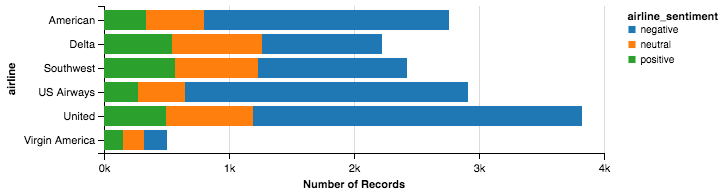

In [6]:
Chart(tweets).mark_bar().encode(
    x = 'count(airline_sentiment):Q',
    y = 'airline',
    color = 'airline_sentiment'
)

In [7]:
tweets['countval']=1
tweets.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

   countval  
0         1  
1         1  
2         1  
3         1  
4         1

In [8]:
groupby_object=tweets[['airline','airline_sentiment','countval']].groupby(['airline','airline_sentiment']).aggregate(sum)
groupby_object.head()

countval
airline  airline_sentiment          
American negative               1960
         neutral                 463
         positive                336
Delta    negative                955
         neutral                 723

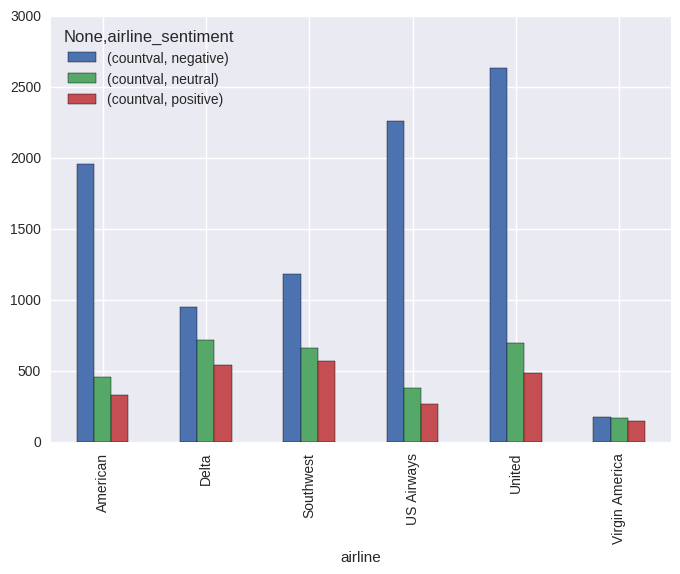

In [9]:
groupby_object.unstack(level=1).plot(kind='bar')

In [10]:
#f, ax = matplotlib.pyplot.subplots(figsize=(8, 54))
#sbn.barplot(x=countrytemp['avgtemp'], y=countrytemp['countries'], palette=sbn.color_palette("coolwarm", len(avgtempres)), ax=ax)
#
#texts = ax.set(ylabel="", xlabel="Temperature (Celsius)", title="Average temperature in each country")

In [11]:
data = tweets

In [12]:
important_words =['accessable', 'accomplished', 'adaptable', 'admiringly', 'adulation', 'advocated', 'affirmation', 'agility',
       'amazed', 'amiability', 'amusing', 'appreciated', 'articulate', 'astonished', 'attraction', 'available',
       'awesomely', 'beautifully', 'benefactor', 'best', 'blessing', 'bonus', 'brave', 'brighten', 'buoyant',
       'carefree', 'charisma', 'cheerful', 'clarity', 'cleared', 'colorful', 'commitment', 'complemented', 'confident',
       'constructive', 'convienient', 'correctly', 'courtly', 'cushy', 'dawn', 'dedicated', 'delicacy', 'deservedly',
       'dextrous', 'distinctive', 'doubtless', 'earnest', 'easy', 'ecstatic', 'efficiently', 'elatedly', 'eloquently',
       'enchanting', 'endorsement', 'enhanced', 'enlighten', 'enterprising', 'enthusiastic', 'enviably', 'eulogize',
       'exaltation', 'exceeding', 'excellent', 'excites', 'exonerate', 'exuberance', 'eyecatching', 'faithfulness',
       'fantastic', 'fast-paced', 'favorite', 'feisty', 'festive', 'first-in-class', 'flourish', 'formidable',
       'freedom', 'ftw', 'gainfully', 'generosity', 'gladden', 'glistening', 'god-given', 'goood', 'grand', 'gratitude',
       'gush', 'handily', 'hardier', 'healthy', 'helping', 'holy', 'hospitable', 'humorous', 'idyllic', 'immaculately',
       'impressed', 'improving', 'inexpensive', 'innocuous', 'instantly', 'intimacy', 'invigorate', 'irresistibly',
       'joyous', 'keenly', 'laudable', 'lean', 'lighter', 'lovable', 'low-price', 'luckiest', 'luxurious',
       'magnificently', 'marvelously', 'matchless', 'meritorious', 'meticulous', 'modern', 'neat', 'nobly', 'nurturing',
       'opulent', 'outshone', 'overtakes', 'pamperedly', 'patience', 'peach', 'permissible', 'playful', 'pleasure',
       'polished', 'powerfully', 'preferable', 'pretty', 'prodigious', 'profusion', 'promoter', 'prosperous', 'prowess',
       'qualify', 'raptureous', 'reaffirm', 'reclaim', 'recovery', 'reform', 'regally', 'reliable', 'renewed',
       'resourceful', 'restful', 'reverent', 'reward', 'righteously', 'rockstar', 'sagacity', 'satisfied', 'seamless',
       'sensation', 'sharp', 'simplest', 'skillful', 'smiles', 'snazzy', 'soothingly', 'speedily', 'splendor',
       'state-of-the-art', 'steadiness', 'straightforward', 'stunningly', 'sublime', 'succes', 'suitable', 'support',
       'supurbly', 'swankiest', 'talent', 'tenaciously', 'thoughtfully', 'thriving', 'titillatingly', 'tougher',
       'triumphal', 'trusting', 'unabashed', 'undaunted', 'unforgettable', 'unselfish', 'upliftingly', 'valor',
       'victorious', 'vivid', 'well', 'well-intentioned', 'well-wishers', 'willingness', 'wisely', 'woo', 'worthy',
       'zippy', 'abominably', 'abscond', 'abuses', 'accuse', 'achey', 'addict', 'adulterated', 'affront', 'aggrieved',
       'ailing', 'allegation', 'ambivalence', 'anger', 'annoyances', 'antagonize', 'antipathy', 'apathy',
       'apprehension', 'arrogance', 'aspersions', 'atrocity', 'authoritarian', 'aweful', 'back-woods', 'bad', 'bane',
       'barren', 'batty', 'beguile', 'belligerent', 'berserk', 'betraying', 'bias', 'biting', 'blame', 'blather',
       'blindingly', 'blotchy', 'blurry', 'bombard', 'botch', 'brainless', 'breach', 'brimstone', 'bruises', 'brute',
       'bulky', 'bum', 'bunk', 'busybody', 'callous', 'cannibalize', 'carp', 'catastrophe', 'chafe', 'chatterbox',
       'cheerless', 'chore', 'clogged', 'coerce', 'comical', 'complaint', 'conceit', 'condemnable', 'confessions',
       'confrontation', 'cons', 'consternation', 'contemptuously', 'contravene', 'corrupt', 'coupists', 'crafty',
       'crashes', 'creaking', 'cringe', 'criticism', 'crowded', 'crumble', 'culpable', 'cuss', 'damn', 'dark', 'dawdle',
       'death', 'debilitating', 'deceitfully', 'decline', 'defame', 'deficient', 'degeneration', 'dejectedly', 'delude',
       'demolisher', 'denial', 'denunciation', 'deprave', 'deprive', 'desertion', 'desperate', 'despondency', 'destroy',
       'detest', 'detracts', 'deviation', 'diabolic', 'die', 'dilly-dally', 'dirt', 'disadvantageous', 'disagreement',
       'disappointment', 'disasterous', 'discomfit', 'disconsolation', 'discountenance', 'discriminate', 'disgraceful',
       'disgustingly', 'disillusion', 'disintegrates', 'disloyalty', 'disobedience', 'disown', 'displaced', 'disquiet',
       'disrespectablity', 'dissappointed', 'dissembler', 'dissing', 'distaste', 'distraught', 'disturb',
       'divisiveness', 'domineer', 'doubts', 'downhearted', 'drag', 'drastically', 'drippy', 'drowning', 'dumb', 'dust',
       'egomania', 'embarrass', 'emphatically', 'engulf', 'entrapment', 'err', 'eschew', 'exagerate', 'excessive',
       'exhausted', 'expensive', 'expunge', 'extremism', 'failed', 'fallacies', 'falsehood', 'fanaticism', 'fascist',
       'fatally', 'fatuity', 'fearfully', 'felon', 'fibber', 'figurehead', 'flagrant', 'flare', 'fleed', 'flimflam',
       'fool', 'foreboding', 'forsaken', 'frail', 'freaking', 'frenzy', 'frighten', 'fruitless', 'fucking', 'funnily',
       'futile', 'galling', 'gawk', 'gibe', 'glibly', 'goad', 'grainy', 'grievances', 'grisly', 'grudge', 'grumpily',
       'hack', 'hampered', 'harassment', 'hardheaded', 'harpy', 'haste', 'hates', 'hazard', 'heartless', 'hedonistic',
       'hells', 'hideously', 'hoard', 'hopelessness', 'horrifying', 'hubris', 'hurted', 'hypocritical', 'idiotic',
       'ignore', 'ill-sorted', 'illiterate', 'imbecile', 'immoral', 'impeach', 'imperialist', 'impinge', 'impolitic',
       'impotent', 'improbability', 'impudently', 'inaccurate', 'inadvisably', 'incapable', 'inclement', 'incompatible',
       'incongruous', 'inconsistency', 'incorrigibly', 'indecorum', 'indignantly', 'indistinguishable',
       'ineffectualness', 'ineloquently', 'inescapably', 'inexpert', 'infection', 'infiltrators', 'infraction',
       'ingratitude', 'iniquitous', 'inopportune', 'insensitive', 'insincerity', 'instability', 'insufficiency',
       'insupportably', 'intermittent', 'intolerance', 'invader', 'invisible', 'irks', 'irragularity', 'irrecoverably',
       'irrepressible', 'irritant', 'issues', 'jealous', 'jerk', 'judder', 'kill', 'kook', 'laconic', 'lame-duck',
       'lapse', 'lawbreaking', 'leaks', 'lemon', 'lewdness', 'lier', 'listless', 'loathsomely', 'loophole', 'loss',
       'ludicrous', 'lurid', 'madly', 'malevolence', 'maltreatment', 'manipulation', 'massacres', 'meddlesome',
       'mendacious', 'midget', 'misapprehend', 'mischievous', 'miserably', 'misguided', 'misleadingly', 'miss',
       'mistress', 'moan', 'molestation', 'mope', 'mortified', 'muddy', 'murky', 'nagging', 'nauseating', 'negate',
       'nepotism', 'nightmare', 'nonexistent', 'obese', 'obnoxiously', 'obsessively', 'obstructs', 'oddities',
       'offensively', 'onslaught', 'oppressively', 'outcry', 'over-acted', 'overbalanced', 'overloaded', 'overshadow',
       'overstatements', 'overwhelmingly', 'pale', 'panicked', 'pariah', 'patronize', 'peeved', 'perilously',
       'pertinaciously', 'perverted', 'petty', 'pigs', 'pitilessly', 'plight', 'poisonously', 'poor', 'prattle',
       'prejudicial', 'pretentious', 'primitive', 'profanity', 'protesting', 'punch', 'puzzling', 'quash', 'racy',
       'rampage', 'rants', 'ravage', 'reckless', 'refuses', 'regret', 'rejecting', 'remorse', 'reprehensible',
       'reprove', 'repulsing', 'restless', 'retarded', 'revert', 'rhetoric', 'rigid', 'risks', 'rough', 'ruinous',
       'rust', 'sacrificed', 'salacious', 'satirize', 'scandalized', 'scarcely', 'scathing', 'scorchingly',
       'scrambling', 'screwed-up', 'seedy', 'self-serving', 'seriousness', 'shabby', 'shamefully', 'shimmy', 'shoddy',
       'shrew', 'sick', 'silly', 'skeletons', 'skulk', 'slaughtered', 'sloooow', 'slower', 'slumpping', 'smelled',
       'smoulder', 'smuttiest', 'snarl', 'snobish', 'somber', 'spade', 'spite', 'spoiled', 'spoonfed', 'squeak',
       'stagnation', 'standstill', 'stealing', 'sticky', 'stingingly', 'straggle', 'streaky', 'stridently', 'strut',
       'stumped', 'stupify', 'subjected', 'substandard', 'sucks', 'suffering', 'sully', 'suppress', 'swamped', 'taboo',
       'tanks', 'tauntingly', 'temper', 'tepid', 'tetchily', 'threat', 'thug', 'tingled', 'torment', 'totalitarian',
       'tragically', 'trapped', 'travesty', 'trivial', 'truant', 'two-faced', 'ugly', 'unaccessible', 'unbearablely',
       'uncomfortable', 'unconvincingly', 'undercutting', 'undersized', 'uneasily', 'unexpectedly', 'unforeseen',
       'unhappily', 'uninsured', 'unkindly', 'unlucky', 'unnoticed', 'unprofitable', 'unreadable', 'unrest',
       'unsettled', 'unsteadily', 'untenable', 'unusably', 'unwell', 'upbraid', 'upseting', 'vague', 'vengefulness',
       'vibrate', 'vile', 'vindictive', 'virulence', 'vomiting', 'war-like', 'waste', 'weakening', 'weird', 'wicked',
       'wobble', 'worried', 'worsening', 'wreaked', 'wrinkled', 'yawn']

In [13]:
data['randomNumCol'] = np.random.choice(range(1, 101), data.shape[0])

In [14]:
data.head(30)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0   570306133677760513           neutral                        1.0000   
1   570301130888122368          positive                        0.3486   
2   570301083672813571           neutral                        0.6837   
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
6   570300616901320704          positive                        0.6745   
7   570300248553349120           neutral                        0.6340   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
10  570294189143031808           neutral                        0.6769   
11  570289724453216256          positive                        1.0000   
12  570289584061480960          positive                        1.0000   
13  570287408438120448          positive                        0.6451   
14  570285904809598977          positive                        1.0000   
15  570282469121007616          negative                        0.6842   
16  570277724385734656          positive                        1.0000   
17  570276917301137409          negative                        1.0000   
18  570270684619923457          positive                        1.0000   
19  570267956648792064          positive                        1.0000   
20  570265883513384960          negative                        0.6705   
21  570264145116819457          positive                        1.0000   
22  570259420287868928          positive                        1.0000   
23  570258822297579520           neutral                        1.0000   
24  570256553502068736          negative                        1.0000   
25  570249102404923392          negative                        1.0000   
26  570239632807370753          negative                        1.0000   
27  570217831557677057           neutral                        0.6854   
28  570207886493782019          negative                        1.0000   
29  570124596180955136           neutral                        0.6150   

            negativereason  negativereason_confidence         airline  \
0                      NaN                        NaN  Virgin America   
1                      NaN                     0.0000  Virgin America   
2                      NaN                        NaN  Virgin America   
3               Bad Flight                     0.7033  Virgin America   
4               Can't Tell                     1.0000  Virgin America   
5               Can't Tell                     0.6842  Virgin America   
6                      NaN                     0.0000  Virgin America   
7                      NaN                        NaN  Virgin America   
8                      NaN                        NaN  Virgin America   
9                      NaN                        NaN  Virgin America   
10                     NaN                     0.0000  Virgin America   
11                     NaN                        NaN  Virgin America   
12                     NaN                        NaN  Virgin America   
13                     NaN                        NaN  Virgin America   
14                     NaN                        NaN  Virgin America   
15             Late Flight                     0.3684  Virgin America   
16                     NaN                        NaN  Virgin America   
17              Bad Flight                     1.0000  Virgin America   
18                     NaN                        NaN  Virgin America   
19                     NaN                        NaN  Virgin America   
20              Can't Tell                     0.3614  Virgin America   
21                     NaN                        NaN  Virgin America   
22                     NaN              

In [15]:
eighty = data[data['randomNumCol'] <= 80]
eighty = eighty[eighty['airline_sentiment'] != 'neutral']

In [16]:
twenty = data[data['randomNumCol'] >= 80]
twenty = twenty[twenty['airline_sentiment'] != 'neutral']

In [20]:
def clean(text):
    text2=re.sub(r'^[A-Za-z @]',"",text).lower()
    lst=text2.strip().split(" ")
    index = 0
   
    return lst

In [21]:
eighty['cleantext'] = eighty['text'].apply(clean)

In [22]:
eighty.head(50)

tweet_id airline_sentiment  airline_sentiment_confidence  \
1    570301130888122368          positive                        0.3486   
3    570301031407624196          negative                        1.0000   
4    570300817074462722          negative                        1.0000   
5    570300767074181121          negative                        1.0000   
6    570300616901320704          positive                        0.6745   
8    570299953286942721          positive                        0.6559   
9    570295459631263746          positive                        1.0000   
11   570289724453216256          positive                        1.0000   
13   570287408438120448          positive                        0.6451   
14   570285904809598977          positive                        1.0000   
17   570276917301137409          negative                        1.0000   
18   570270684619923457          positive                        1.0000   
21   570264145116819457          positive                        1.0000   
22   570259420287868928          positive                        1.0000   
24   570256553502068736          negative                        1.0000   
25   570249102404923392          negative                        1.0000   
28   570207886493782019          negative                        1.0000   
30   570114021854212096          negative                        1.0000   
32   570088404156698625          negative                        1.0000   
33   570084582780899328          negative                        1.0000   
34   570076792993611776          positive                        1.0000   
37   570045393565691904          positive                        1.0000   
39   570035876845084672          negative                        1.0000   
40   570033593394667521          positive                        0.6639   
47   570010571707256832          positive                        1.0000   
55   569996412286582784          negative                        0.6939   
56   569996245462159361          positive                        1.0000   
61   569989034501500928          negative                        1.0000   
66   569976620158578688          negative                        1.0000   
67   569973821396152323          negative                        1.0000   
73   569946362126602240          negative                        1.0000   
74   569942903683813376          positive                        1.0000   
75   569941957490774016          positive                        1.0000   
78   569935232033366017          negative                        1.0000   
80   569933816963342337          negative                        1.0000   
81   569933777931145216          positive                        1.0000   
82   569933405506310144          negative                        0.6792   
83   569933360564342784          negative                        1.0000   
84   569929243146088448          negative                        1.0000   
85   569926998824394752          negative                        1.0000   
89   569919041244147712          negative                        1.0000   
93   569911674158731264          negative                        1.0000   
95   569910981868060673          negative                        1.0000   
96   569909224521641984          negative                        1.0000   
97   569907336485019648          negative                        1.0000   
98   569896805611089920          negative                        1.0000   
99   569894449620369408          negative                        1.0000   
101  569892199690678272          negative                        1.0000   
103  569891436100874241          negative                        0.6925   
104  569887310713479168          negative                        1.0000   

                  negativereason  negativereason_confidence         airline  \
1                            NaN                     0.0000  Virgin America   
3                     Bad Fligh

In [23]:
translator = str.maketrans({key: None for key in string.punctuation})
def cleanText(tweet):
    tweet = tweet.lower()
    tweet = tweet.translate(translator)
    tweet = re.sub(r'\b\w\b', '', tweet)
    return tweet

In [24]:
data['cleantext'] = data.text.map(cleanText)

In [25]:
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

   countval  randomNumCol                                          cleantext  
0         1            11                   virginamerica what dhepburn said  
1         1            30  virginamerica plus youve added commercials to ...  
2         1            70  virginamerica  didnt today must mean  need to ...  
3         1             8  virginamerica its really aggressive to blast o...  
4         1             9  virginamerica and its  really big bad thing ab...

In [28]:

wordcloud = WordCloud().generate()
plt.imshow(wordcloud)
                                

TypeError: expected string or bytes-like object